In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

from matplotlib.colors import LogNorm



In [2]:

####################################################################################################
####################################################################################################

file_all = "../pax_waveform_simulator/merged/merged_all_v180220.pkl"

df_all   = pd.read_pickle(file_all)
df_s1s2   = df_all[df_all['interactions'] == 1]


In [4]:

####################################################################################################
####################################################################################################

nEventsTotal = df_all.shape[0]
nEventsS1S2  = df_s1s2.shape[0]

print()
print("Total Events:   " + str(nEventsTotal))
print("S1 & S2 Events: " + str(nEventsS1S2))
#display(df_s1s2[:][0:5])
print()



Total Events:   2000
S1 & S2 Events: 1205



In [6]:

####################################################################################################
####################################################################################################

arr_s1_true = df_s1s2[:]['s1_photons'].as_matrix()
arr_s1_reco = np.zeros(1) #df_s1s2[:]['reco_s2_electrons'].as_matrix()



In [9]:

####################################################################################################
####################################################################################################

s1_max_true = np.amax(arr_s1_true)
s1_max_reco = np.amax(arr_s1_reco)

s1_true_mean = np.mean(arr_s1_true)
s1_reco_mean = np.mean(arr_s1_reco)
s1_true_std  = np.std (arr_s1_true)
s1_reco_std  = np.std (arr_s1_reco)

s1_label_true = 'true (std: %.01f, mean: %.01f)'% (s1_true_std, s1_true_mean)
s1_label_reco = 'reco (std: %.01f, mean: %.01f)'% (s1_reco_std, s1_reco_mean)

print()
print("S1 True Max: " + str(s1_max_true))
print("S1 Reco Max: " + str(s1_max_reco))
print()

s1_max     = 750
s1_nbins   = 750/10

s1_delta_max   = 50
s1_delta_nbins = 100/2

eps       = 1


S1 True Max: 831
S1 Reco Max: 0.0



In [10]:

####################################################################################################
####################################################################################################

arr_s1_true_ovflw = arr_s1_true.copy()
arr_s1_reco_ovflw = arr_s1_reco.copy()

arr_s1_true_ovflw[arr_s1_true_ovflw > s1_max] = s1_max - eps
arr_s1_reco_ovflw[arr_s1_reco_ovflw > s1_max] = s1_max - eps



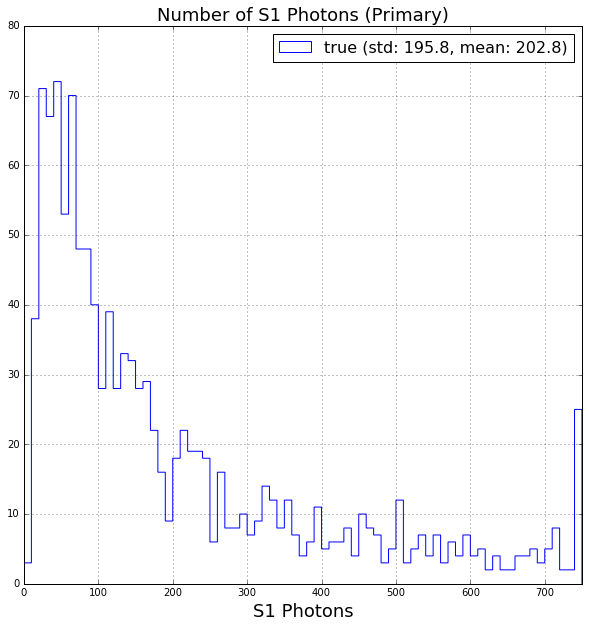

In [13]:

####################################################################################################
####################################################################################################

rows = 2
cols = 2

#fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3)


####################################################################################################
####################################################################################################

#plt.subplot(rows, cols, 2)
plt.hist(arr_s1_true_ovflw, bins=s1_nbins, range=[0, s1_max], label=s1_label_true, fill=False, histtype='step')
plt.xlim([0, s1_max])
plt.title('Number of S1 Photons (Primary)', fontsize=18)
plt.xlabel('S1 Photons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.close()
print()
display(fig)
print()
